## Умножение и сложение двоичных чисел
используется следующее представление числа: y = 2 * (y//2), если y четное, иначе y = 1 + 2 * (y//2). Тогда x*y = 2 * (x * (y//2)) (+1 если нечетное).
таже используется тот факт, что //2 это сдвиг на 1 бит вправо (1011 = 11(дес.) // 2 = 101 = 5(дес.))

In [1]:
def multipy(x, y):      # O(n^2)
    assert x >= 0
    assert y >= 0
    if y == 0:
        return 0
    z = multipy(x, y // 2)
    if y % 2 == 0:
        return 2 * z
    else:
        return x + 2 * z

multipy(10, 2)

20

уменьшение размерности задачи 

представление сомножителей в виде суммы половин их записей старших и младших битов: x = xl + xr = 2^(n/2)*xl + xr
тогда x*y = (2^(n/2)*xl + xr) * (2^(n/2)*yl + yr) = 2^(n)*xl*yl + 2^(n/2)*(xlyr+xr*yl) + xr*yr -> 4 рекурсивных вызова на умножение числе с в 2 раза меньшей длинной.
Сложность T(n) = 4*T(n/2) + O(n^2), где 4*T это 4 рекурсивны вызова. => T(n) <= O(n^2)

улучшение алгоритма
для вычисления (xlyr+xr*yl) используется (xl + xr)*(yl + yr) = (xlyr+xr*yl) - xl*yl -  xr*yr. Вычитаемые слагаемые у нас уже есть. Причем в скобках не исходные числа (нет умножения старшей части на 2^(n/2).
в итоге T(n) = 3*T(n/2) + O(n^2)

получается алгоритм Карацубы (задачу которому ставил Колмогоров), сложность которого O(n^log2(3)=1.59...). Быстрее только аглоритм на БПФ - почти линейный.

In [2]:
def karatsuba(x, y):
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    else:
        m = max(len(str(x)),len(str(y)))
        m2 = m // 2

        a = x // 10**(m2)
        b = x % 10**(m2)
        c = y // 10**(m2)
        d = y % 10**(m2)

        z0 = karatsuba(b,d)
        z1 = karatsuba((a+b),(c+d))
        z2 = karatsuba(a,c)

        return (z2 * 10**(2*m2)) + ((z1 - z2 - z0) * 10**(m2)) + (z0)

karatsuba(12,12)

144

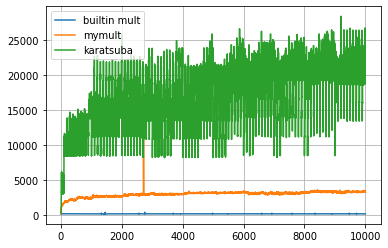

In [3]:
from matplotlib import pyplot as plt
import time, random, string

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc

def m(x, y):
    return x * y

N, step = 10000, 1
args = list(zip(range(0, N, step), range(0, N, step)))
xs = list(range(0, N, step))
plt.plot(xs, [timed(m, x, y, n_iter=10) for x, y in args], label="builtin mult")
plt.plot(xs, [timed(multipy, x, y, n_iter=10) for x, y in args], label="mymult")
plt.plot(xs, [timed(karatsuba, x, y, n_iter=10) for x, y in args], label="karatsuba")
plt.legend()
plt.grid(True)
plt.show()



PS умножение матриц. Алгоритм Штрассена.

Аналогичные замены приводят O(n^3) к рекурсивной схеме с 7 шагами, что дает O(n^log2(7)=2,8) оптимизации. При этом константа очень большая, и выгода от алгоритма получается только на очень больших матрицах.